# Data Preparation For Employee Attrition
> Author: Hannan Khan  
> Last Updated: 2022-04-01 04:52:48

The original data can be found [here](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset).

## Loading Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
sns.set_palette("muted")

In [2]:
df = pd.read_csv(r"../data/Employee_Attrition.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

## Exploratory Data Analysis

### Summary Statistics
Let's start with looking at the summary statistics for the data:

In [3]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

The raw data has 26 numerical variables, with 1470 rows.  
The **average employee** is 36 years old, gets paid $65/hour, has spent 7 years at the company, with 4 years in their current role.

### Pairplot
Now that we have a general idea of the average employee, we can look at the distribution of the data.

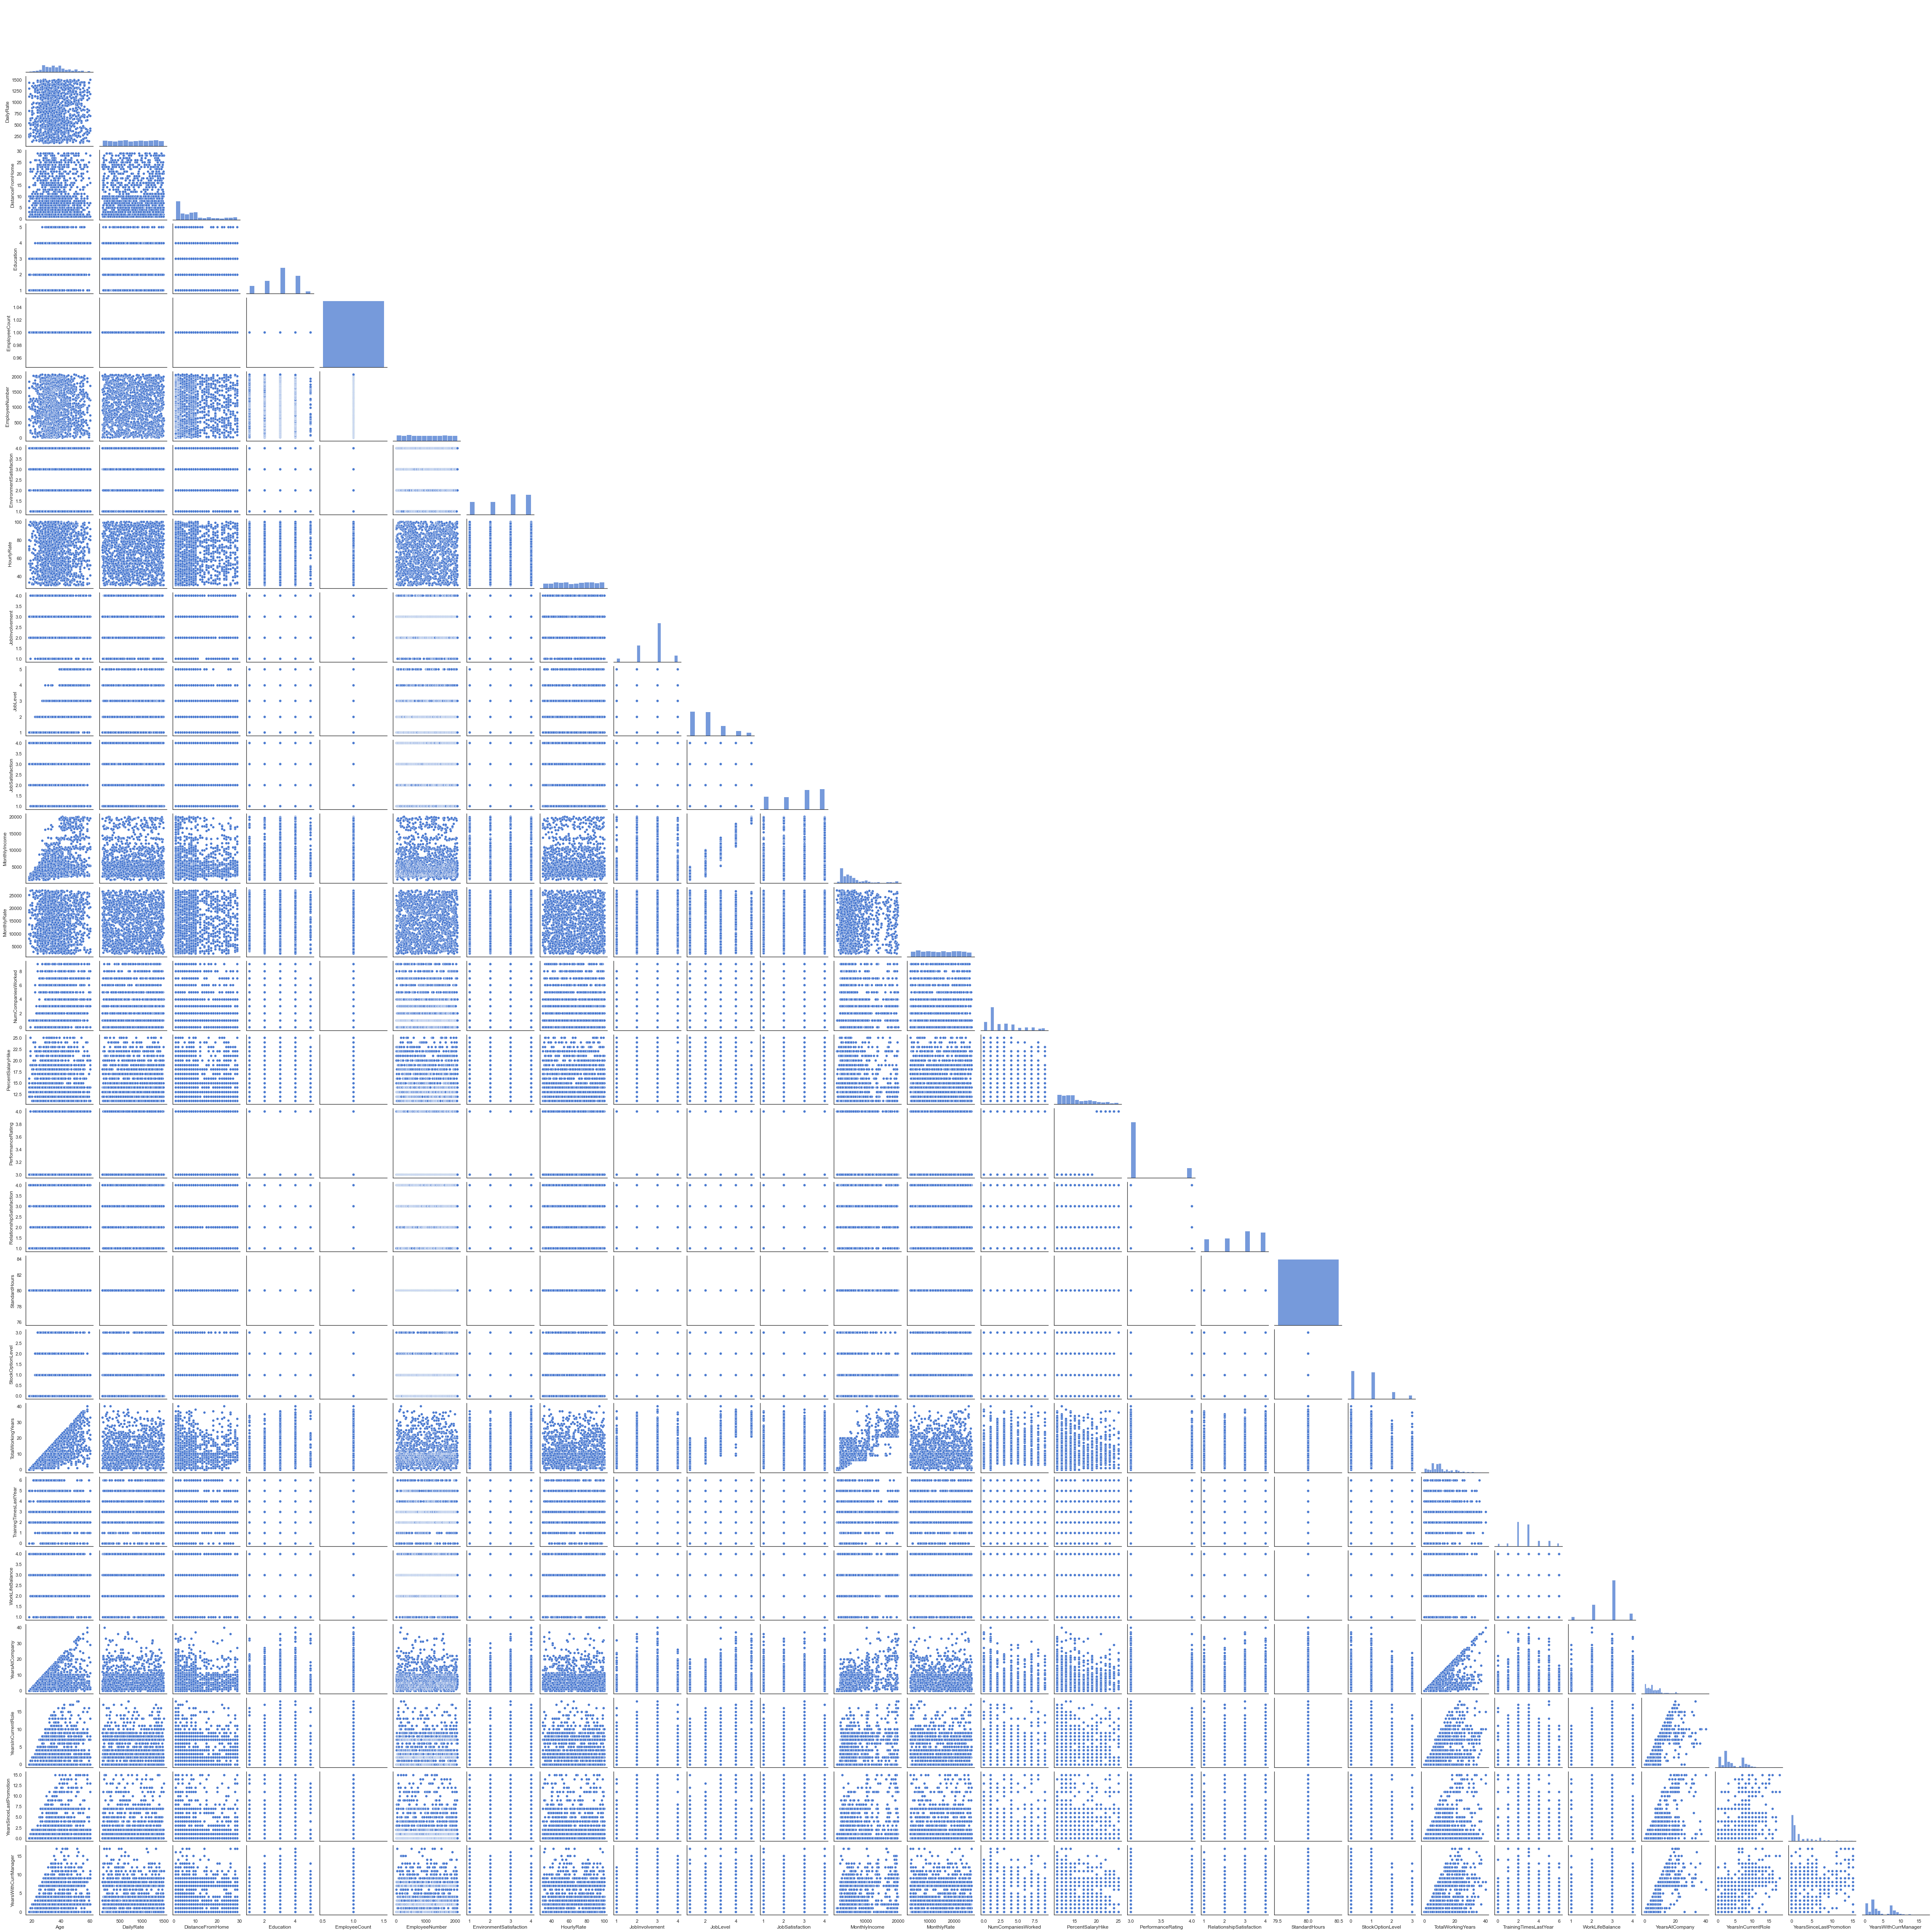

In [4]:
sns.pairplot(df, corner = True)

There doesn't seem to be any unique correlations between the features.  
The age variable seems to be positively correlated with all the features that include "years". However, this is expected and not a surprise.

### Distributions & Outliers
Let's take a closer look at the distributions for each feature, as well as if each feature has outliers.

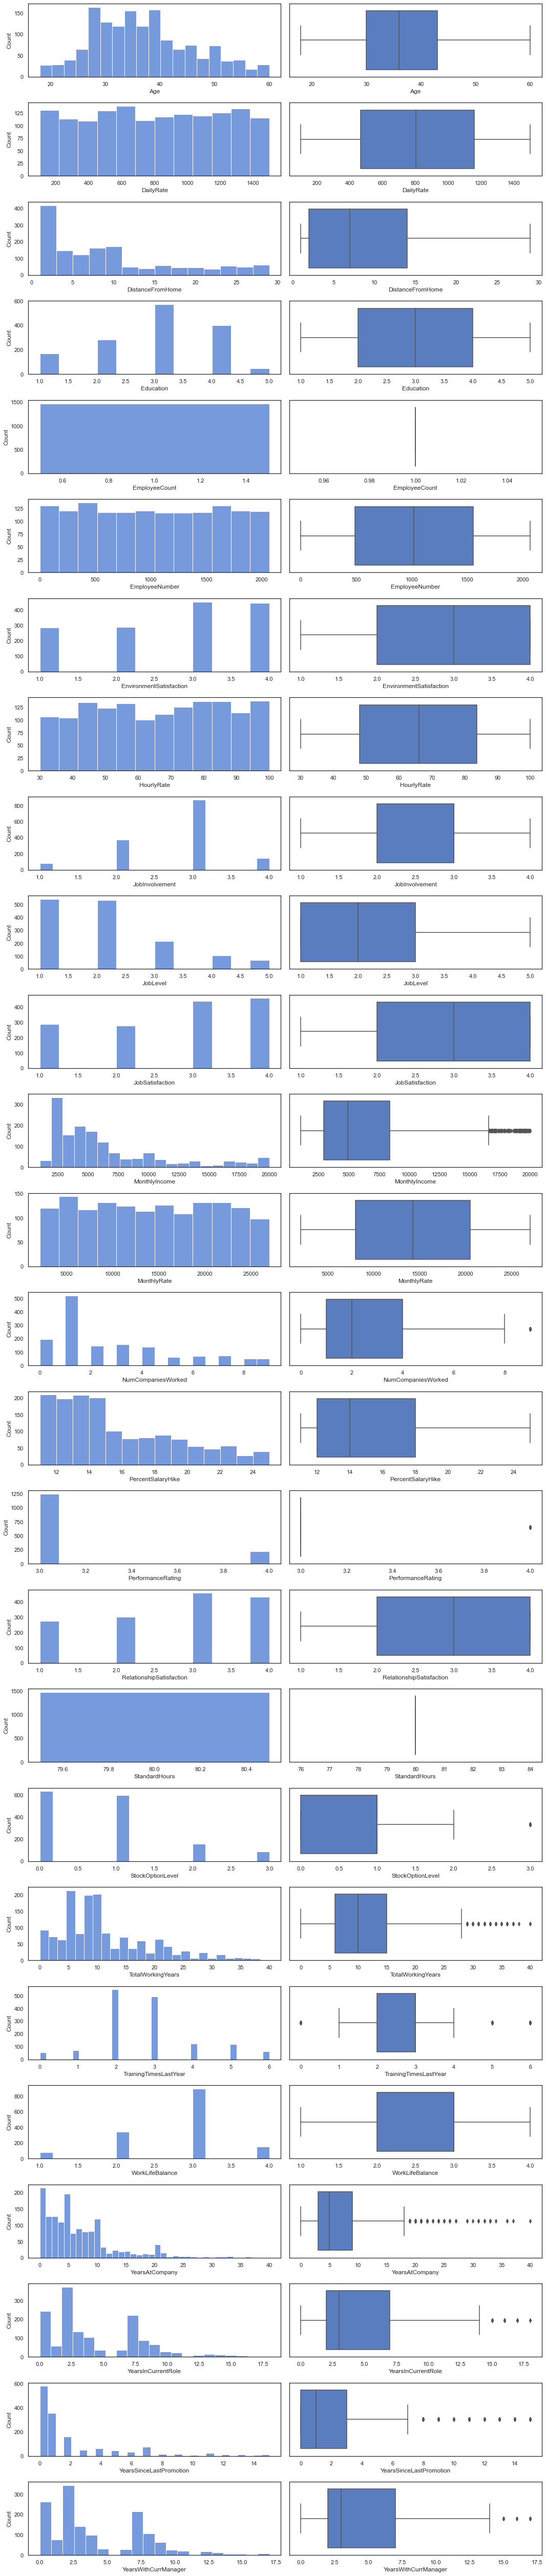

In [5]:
number_columns = df.dtypes[df.dtypes == 'int64'].index

fig, axes = plt.subplots(len(number_columns), 2, figsize=(15,70), tight_layout = True)

for i,col in enumerate(number_columns):
    sns.histplot(df[col], ax=axes[i,0])
    sns.boxplot(x=df[col], ax=axes[i,1])

From the histograms, we can see:
* `Age` is normally distributed with slight right-skew..
* Many variables are uniformly distributed.
* Other variables are skewed right `(DistanceFromHome, JobLevel, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, StockOptionLevel, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion)`.

From the boxplots, we can see:
* Many variables have outliers `(MonthlyIncome, NumCompaniesWorked, PerformanceRating, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager)`.

### Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

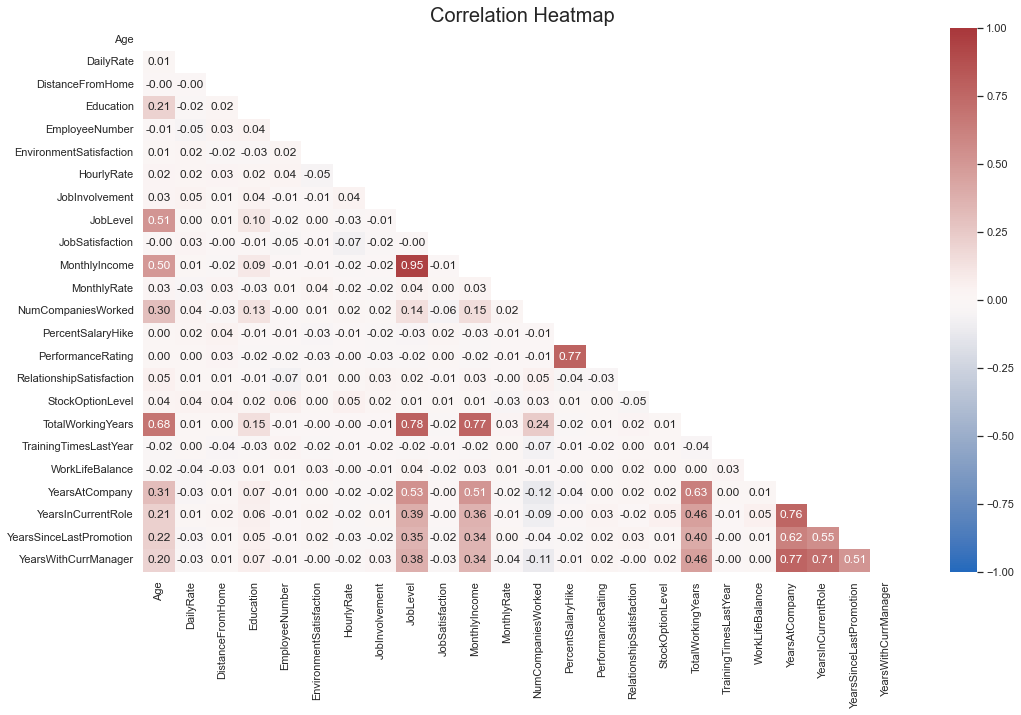

In [6]:
plt.figure(figsize=(17,10))

corr = df.drop(["EmployeeCount", "StandardHours"], axis = 1).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot = True, fmt=".2f", vmin=-1, vmax=1,
            cmap="vlag").set_title("Correlation Heatmap", fontdict={'fontsize':20})

## Data Cleaning & Feature Engineering

### Duplicate Observations
If there are any duplicates, we should get rid of them. We can use the`EmployeeNumber` column to check for duplicates.

In [7]:
dupes_present = not df['EmployeeNumber'].is_unique

print("Are duplicates present in our data?", dupes_present)

Are duplicates present in our data? False


### Null/Missing Values
Let's deal with null values:

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Awesome! Rare to have a full dataset from the beginning.

Upon perusing the data, I did find an error in the `TotalWorkingYears`, in which there was a negative infinite value. Our best bet would be to replace this value with either 0 or 1. Since the employee is present at the company currently, it is a safe bet to replace -inf with 1.  
I also found an error with `NumCompaniesWorked` where the value was sometimes set to 0. This is not true, as the employee was once employed by the company that produced the dataset. So, we will replace these 0 values with 1.

In [9]:
df['TotalWorkingYears'].replace({-np.inf: 1}, inplace=True)
df['NumCompaniesWorked'].replace({0: 1}, inplace=True)
print(df['TotalWorkingYears'].unique())
print(df['NumCompaniesWorked'].unique())

[ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14 15  4 29 28
 21 25 20 11 16 37 38 30 40 18 36 34 32 33 35 27]
[8 1 6 9 4 5 2 7 3]


Great! That has taken care of that problem.

### Data Typing
Let's see if the data types for each column matches up:

In [10]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

We can change a few things here:
* Encode `Attrition` to a binary numeric type where 1 means yes.
* One-hot encode the `BusinessTravel` column, and then delete it.
* One-hot encode the `Department` column, and then delete it.
* One-hot encode the `EducationField` column, and then delete it.
* Encode `Gender` to a binary numeric type where 1 means female.
* One-hot encode the `JobRole` column, and then delete it.
* One-hot encode the `MaritalStatus` column, and then delete it.
* Encode `Over18` to a binary numeric type where 1 means yes.
* Encode `OverTime` to a binary numeric type where 0 means no.

In [11]:
df["Attrition"].replace({"No":0, "Yes":1}, inplace = True)

df = df.join(pd.get_dummies(df["BusinessTravel"]))

df["Department"].replace({"Research & Development":"R&D", "Human Resources":"HR"},
                         inplace = True)
df = df.join(pd.get_dummies(df["Department"], prefix="Dep"))

df["EducationField"].replace({"Life Sciences":"Life_Sci", "Technical Degree":"Technical_Deg","Human Resources":"HR"},
                            inplace = True)
df = df.join(pd.get_dummies(df["EducationField"], prefix="Edu"))

df["Gender"].replace({"Male":0, "Female":1}, inplace = True)

df["JobRole"].replace({"Sales Executive":"Sales_Exec", "Research Scientist":"Research_Sci",
                       "Laboratory Technician":"Lab_Tech", "Manufacturing Director":"Manuf_Dir",
                       "Healthcare Representative":"Healthcare_Rep", "Sales Representative":"Sales_Rep",
                      "Research Director":"Research_Dir", "Human Resources":"HR"},
                      inplace = True)
df = df.join(pd.get_dummies(df["JobRole"], prefix="Job"))

df = df.join(pd.get_dummies(df["MaritalStatus"]))

df["Over18"].replace({"Y":1}, inplace = True)

df["OverTime"].replace({"No":0, "Yes":1}, inplace = True)

# now we delete all one hot encoded cols:
df.drop(["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus"], axis = 1, inplace = True)

# take a peek at the new data:
df.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0               1                        2       1          94  ...   
1               2                        3       0          61  ...   
2               4                        4       0          92  ...   
3               5                        4       1          56  ...   
4               7                        1       0          40  ...   

   Job_Lab_Tech  Job_Manager  Job_Manuf_Dir  Job_Research_Dir  \
0             0            0              0                 0   
1             0            0              0                 0   
2             1            0              0                 0   
3             0            0              0                 0   
4             1            0              0                 0   

   Job_Research_Sci  Job_Sales_Exec  Job_Sales_Rep  Divorced  Married  Single  
0                 0               1              0         0        0       1  
1                 1               0              0         0        1       0  
2                 0               0              0         0        0       1  
3                 1               0              0         0        1       0  
4                 0               0              0         0        1       0  

[5 rows x 54 columns]

Check to see if data types are updated:

In [12]:
df.dtypes

Age                         int64
Attrition                   int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrM

We can do another correlation heatmap to see whether any new correlations have arised, now that we have converted the categorical features into numerical ones:

Text(0.5, 1.0, 'Cleaned Correlation Heatmap')

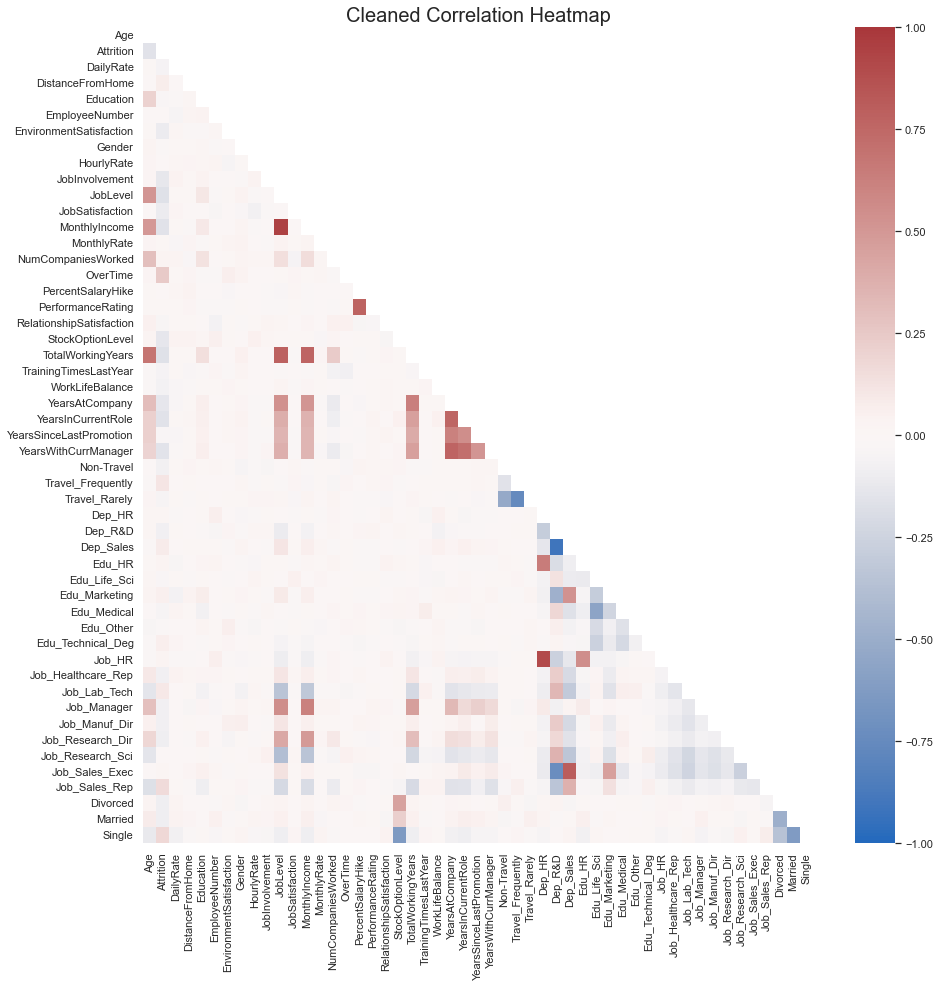

In [13]:
plt.figure(figsize=(15,15))

corr = df.drop(["EmployeeCount", "StandardHours", "Over18"], axis = 1).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, fmt=".2f", vmin=-1, vmax=1,
            cmap="vlag").set_title("Cleaned Correlation Heatmap", fontdict={'fontsize':20})

Not much more useful information present. Only that people who are managers or research directors have a strong positive correlation with their job level and monthly income.

### Outliers

Going off of the previous boxplots, we have outliers in the following columns:
* MonthlyIncome
* NumCompaniesWorked
* PerformanceRating
* StockOptionLevel
* TotalWorkingYears
* TrainingTimesLastYear
* YearsAtCompany
* YearsInCurrentRole
* YearsSinceLastPromotion
* YearsWithCurrManager

Each of these outliers is informative to the employee's tendency to churn. Therefore, we should maintain, and not mutate these outliers.

### Transforming Skewed Features
We had previously identified some skewed features such as:
* DistanceFromHome
* JobLevel
* MonthlyIncome
* NumCompaniesWorked
* PercentSalaryHike
* StockOptionLevel - skipped, since applying log does not help the skew.
* TotalWorkingYears
* YearsAtCompany
* YearsSinceLastPromotion - skipped due to invalid value.

Since these are all right-skewed, we can apply a log10 transformation to reduce the amount of skew. 

In [14]:
df['LogDistanceFromHome'] = np.log10(df['DistanceFromHome'])
df['LogJobLevel'] = np.log10(df['JobLevel'])
df['LogMonthlyIncome'] = np.log10(df['MonthlyIncome'])
df['LogNumCompaniesWorked'] = np.log10(df['NumCompaniesWorked'])
df['LogPercentSalaryHike'] = np.log10(df['PercentSalaryHike'])
df['LogTotalWorkingYears'] = np.log10(df['TotalWorkingYears'])
df['LogYearsAtCompany'] = np.log10(df['YearsAtCompany'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Scaling/Transformations To Create New Features
We can create three new features given the data we have.  
1. We can subtract `YearsAtCompany` from `TotalWorkingYears` to get `YearsAtOtherCompanies`.
2. We can take `TotalWorkingYears` and divide it by `NumCompaniesWorked` to get the `NumYearsAtEachCompany`.
3. We can add up `EnvironmentSatisfaction`, `JobSatisfaction`, and `RelationshipSatisfaction` to get the `OverallSatisfaction`.

In [15]:
df['YearsAtOtherCompanies'] = df['TotalWorkingYears'] - df['YearsAtCompany']
df['NumYearsAtEachCompany'] = df['TotalWorkingYears'] / df['NumCompaniesWorked']

# OverallSatisfaction represents a number out of 12.
df['OverallSatisfaction'] = df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['RelationshipSatisfaction']

## Final Plots/Heatmaps
Let's take a look at the boxplots, distibution plots, and the heat maps, now that we have completed cleaning our dataset.

In [16]:
df.dtypes.index

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Non-Travel', 'Travel_Frequently',
       'Travel_Rarely', 'Dep_HR', 'Dep_R&D', 'Dep_Sales', 'Edu_HR',
       'Edu_Life_Sci', 'Edu_Marketing', 'Edu_Medical', 'Edu_Other',
       'Edu_Technical_Deg', 'Job_HR', 'Job_Healthcare_Rep', 'Job_Lab_Tech',
       'Job_Manager', 'Job_Manuf_Dir', 'Job_Research_Dir', 'Job_Research_Sci',
       'Job_Sales_Exec', 'Job_Sales_Rep', 'Divorced', 'Married', 'Singl

In [17]:
# sort df columns alphabetically
df = df[sorted(df.columns)]

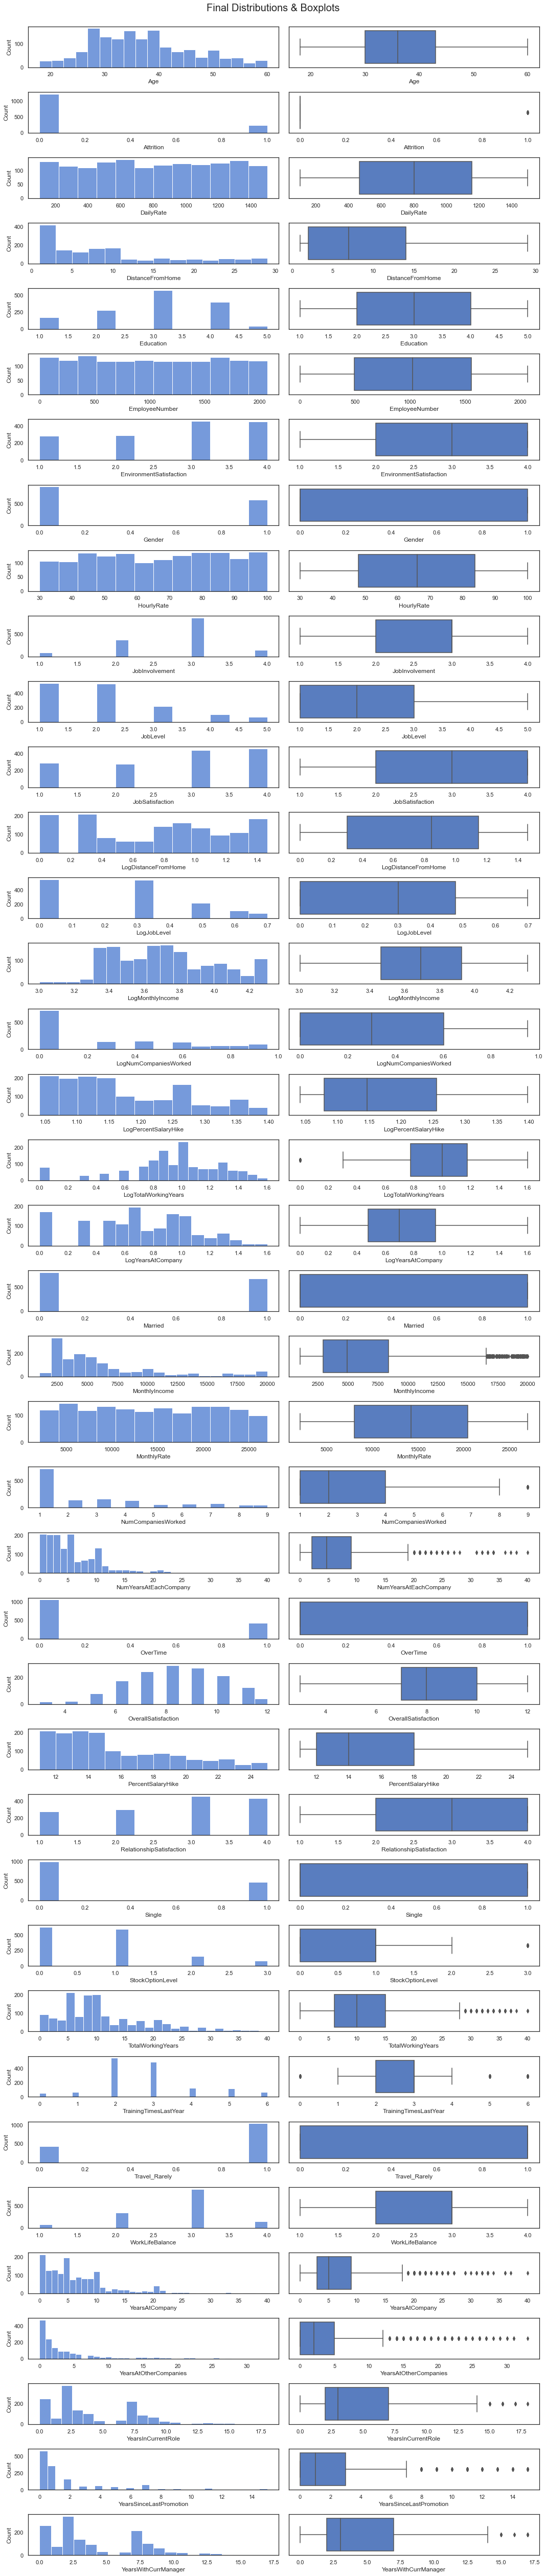

In [18]:
# all of our columns are numbers now
number_columns = df.dtypes.index

# remove binary encoded columns
number_columns = number_columns.drop(['Dep_HR', 'Dep_R&D', 'Dep_Sales', 'Divorced', 'Edu_HR', 'Edu_Life_Sci',
                                     'Edu_Marketing', 'Edu_Medical', 'Edu_Other', 'Edu_Technical_Deg', 'EmployeeCount',
                                     'Job_HR', 'Job_Healthcare_Rep','Job_Lab_Tech', 'Job_Manager', 'Job_Manuf_Dir',
                                      'Job_Research_Dir','Job_Research_Sci', 'Job_Sales_Exec', 'Job_Sales_Rep',
                                     'Non-Travel', 'Over18', 'PerformanceRating', 'StandardHours', 'Travel_Frequently'])

fig, axes = plt.subplots(len(number_columns), 2, figsize=(15,70), tight_layout = True)
fig.suptitle("Final Distributions & Boxplots", y=1, fontsize=20)

for i,col in enumerate(number_columns):
    sns.histplot(df[col], ax=axes[i,0])
    sns.boxplot(x=df[col], ax=axes[i,1])
plt.savefig("imgs/final_dist_box_plots.pdf", format='pdf')

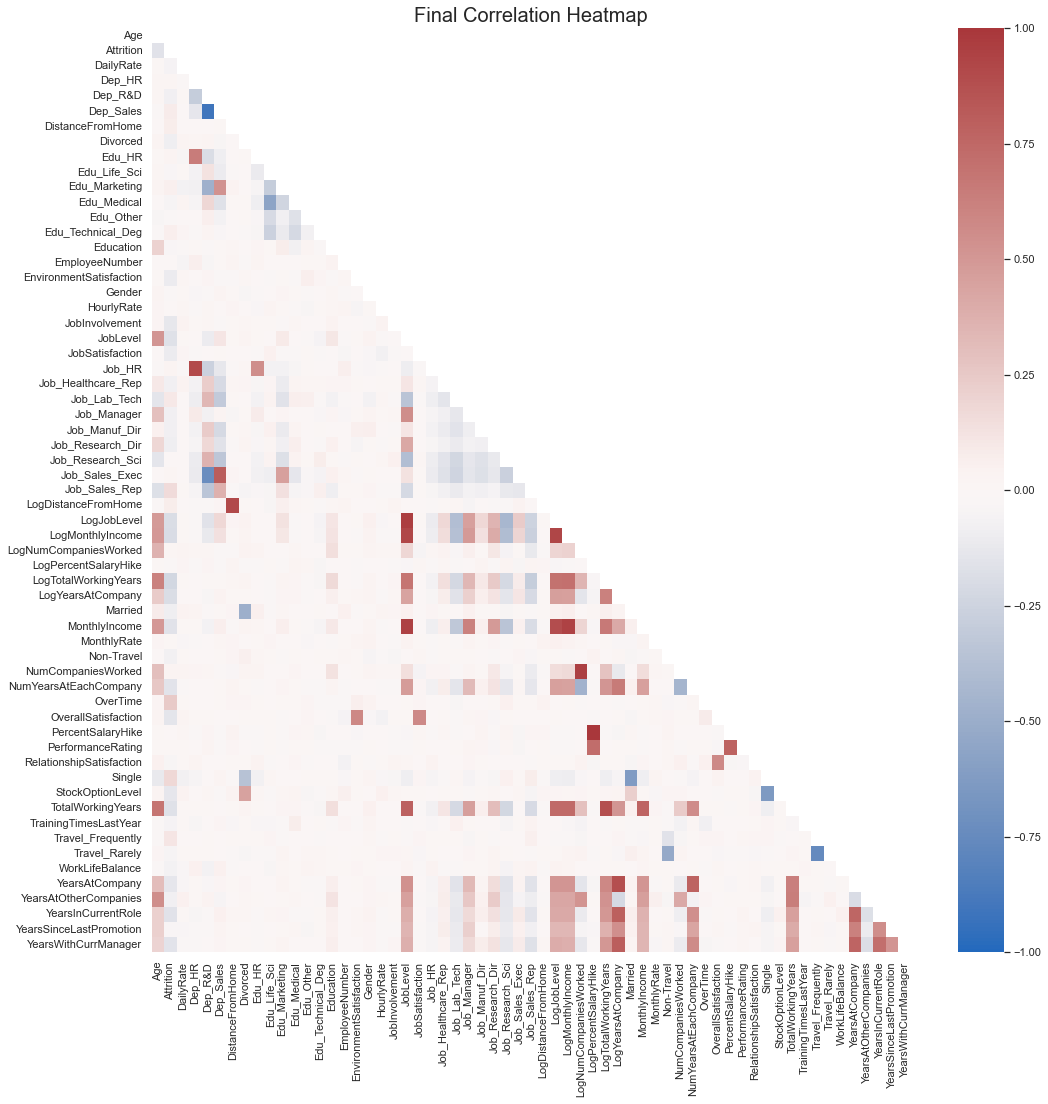

In [19]:
plt.figure(figsize=(17,17))

corr = df.drop(["EmployeeCount", "StandardHours", "Over18"], axis = 1).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, fmt=".2f", vmin=-1, vmax=1,
            cmap="vlag").set_title("Final Correlation Heatmap", fontdict={'fontsize':20})

plt.savefig("imgs/Final Correlation Heatmap.pdf", format='pdf', bbox_inches='tight')

Let's look specifically at the target variable, `Attrition`, and its correlations with other variables.

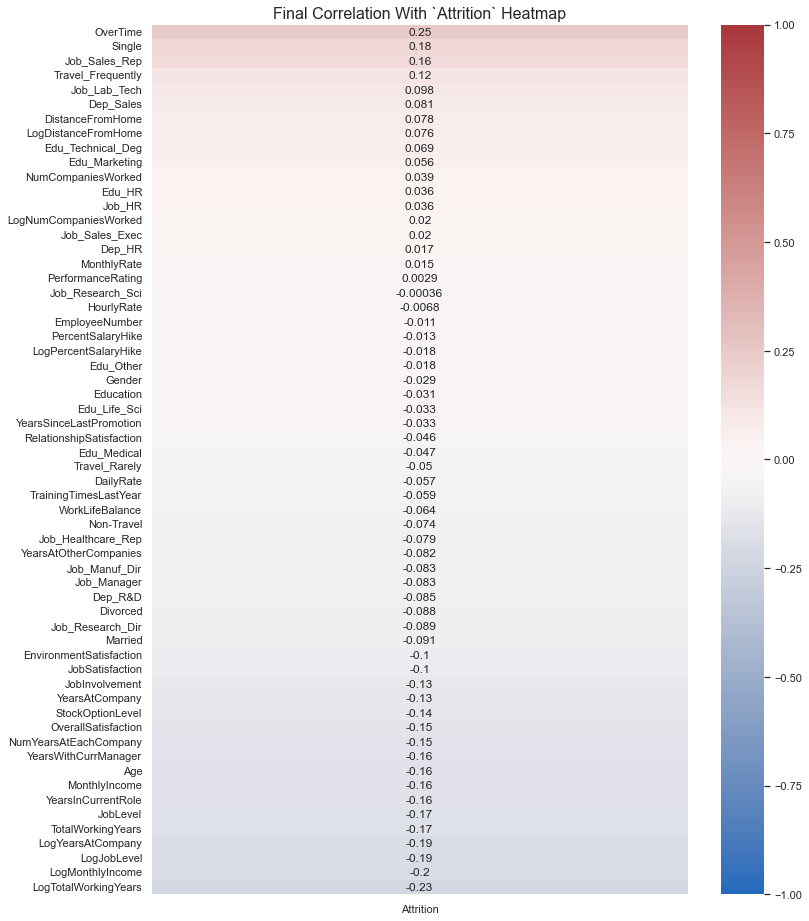

In [20]:
plt.figure(figsize=(12,16))


heatmap = sns.heatmap(df.corr()[['Attrition']].drop(['Attrition', "EmployeeCount", "StandardHours", "Over18"]).sort_values(by='Attrition', ascending=False), vmin=-1, vmax=1, annot=True, cmap='vlag')
heatmap.set_title("Final Correlation With `Attrition` Heatmap", fontdict={"fontsize":16})

plt.savefig("imgs/Final Correlation With Attrition Heatmap.pdf", format='pdf', bbox_inches='tight')

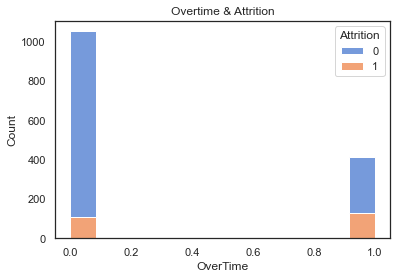

In [21]:
sns.histplot(x='OverTime', hue='Attrition', data=df, multiple='stack').set_title("Overtime & Attrition")

plt.savefig("imgs/Overtime and Attrition.png", dpi=300)

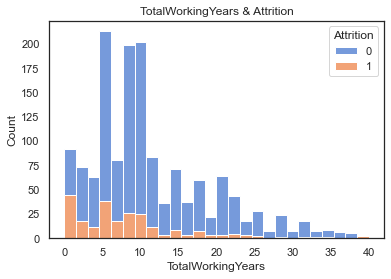

In [22]:
sns.histplot(x='TotalWorkingYears', hue='Attrition', data=df, multiple='stack').set_title("TotalWorkingYears & Attrition")

plt.savefig("imgs/TotalWorkingYears and Attrition.png", dpi=300)

## Conclusions
From the `Correlation With Attrition` heatmap, we can see that the features `Overtime` and `TotalWorkingYears` are weakly correlated with Employee Attrition. Based on the histograms of these features, we can conclude the following:

* Those who work overtime are slightly more likely to churn.
* Those who have been working for <= 1.2 months have a higher churn percentage than those who have been working for > 1.2 months.

## Final Data Cleaning/Manipulation
This part is to make sure that we have not created messy data with our feature engineering efforts.

In [23]:
for col in df.columns:
    unq = df[col].unique()
    if np.inf in unq:
        print("np.inf", col)
    if -np.inf in unq:
        print("-np.inf", col)
    if np.nan in unq:
        print("np.nan", col)

-np.inf LogTotalWorkingYears
-np.inf LogYearsAtCompany


We have quite a few infinite values, so let's take care of those before saving this dataframe as prepared.

In [24]:
df['LogTotalWorkingYears'].replace({-np.inf: 0}, inplace=True)
df['LogYearsAtCompany'].replace({-np.inf: 0}, inplace=True)

## Saving Final Dataframe For Use In Next Notebook

In [25]:
df.to_csv(r"../data/Employee_Attrition_Prepared.csv")

## Next Steps
This project is continued in the next notebook which covers creating a decision tree model to predict employee attrition. The notebook can be found [here](https://github.com/hannankhan888/Data_Science_Portfolio/tree/main/Decision_Trees_Employee_Attrition/Decision_Trees_Employee_Attrition.ipynb).